# Ulike datasett Versjon 2.0

ble bla bla

#### Importere biblioteker

In [2]:
import pandas as pd
import numpy as np

# Visualization
#import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Making plots look better
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

%config InlineBackend.figure_format = 'retina'

#### Innlasting av ulike datasett

In [3]:
# TEK (1. Spetember til 18. Desember)
df_tek = pd.read_csv('vindkraft 181217 TEK met.csv',sep =';', low_memory = False)
    #df_tek.info()

# TEK (delayed 1 hours)
df_tek_delayed_1 = pd.read_csv('vindkraft 181217 TEK met delayed_1.csv',sep =';', low_memory = False)
    #df_tek_delayed.info()    

# TEK (delayed 2 hours)
df_tek_delayed_2 = pd.read_csv('vindkraft 181217 TEK met delayed_2.csv',sep =';', low_memory = False)
    #df_tek_delayed.info()

    
    
# AROME Værdata (1. Spetember til 18. Desember)
df_arome = pd.read_csv('vindkraft 181217 arome.csv',sep =';', low_memory = False)
    #df_arome.info()
    
# AROME Værdata (1 timer forsinket) (1. Spetember til 18. Desember)
df_arome_1 = pd.read_csv('vindkraft 181217 arome delayed_1.csv',sep =';', low_memory = False)
    #df_arome.info()
    
# AROME Værdata (2 timer forsinket) (1. Spetember til 18. Desember)
df_arome_2 = pd.read_csv('vindkraft 181217 arome delayed_2.csv',sep =';', low_memory = False)
    #df_arome.info()

#### Antall fungerende turbiner

In [3]:
df_antall_fungerende_vinturbiner = df_tek[['RRS.S2502.Gunit.M1 G1.AVL',
                     'RRS.S2502.Gunit.M2 G1.AVL',
                     'RRS.S2502.Gunit.M3 G1.AVL',
                     'RRS.S2502.Gunit.M4 G1.AVL',
                     'RRS.S2502.Gunit.M5 G1.AVL',
                     'RRS.S2502.Gunit.M6 G1.AVL',
                     'RRS.S2502.Gunit.M7 G1.AVL',
                     'RRS.S2502.Gunit.M8 G1.AVL',
                     'RRS.S2502.Gunit.M9 G1.AVL',
                     'RRS.S2502.Gunit.M10 G1.AVL',
                     'RRS.S2502.Gunit.M11 G1.AVL',
                     'RRS.S2502.Gunit.M12 G1.AVL',
                     'RRS.S2502.Gunit.M13 G1.AVL',
                     'RRS.S2502.Gunit.M14 G1.AVL',
                     'RRS.S2502.Gunit.M15 G1.AVL',
                     'RRS.S2502.Gunit.M16 G1.AVL',
                      'RRS.S2502.Gunit.M17 G1.AVL'
                     ]]

# Summer alle kollonnene - dvs. teller antall fungerende vindturbiner (1 = fungerer, 0 = ute av drift)
df_antall_fungerende_vinturbiner['antall_fungerende'] = df_tek['RRS.S2502.Gunit.M1 G1.AVL'] + df_tek['RRS.S2502.Gunit.M2 G1.AVL'] + df_tek['RRS.S2502.Gunit.M3 G1.AVL'] + df_tek['RRS.S2502.Gunit.M4 G1.AVL'] + df_tek['RRS.S2502.Gunit.M5 G1.AVL'] + df_tek['RRS.S2502.Gunit.M6 G1.AVL'] +df_tek['RRS.S2502.Gunit.M7 G1.AVL'] + df_tek['RRS.S2502.Gunit.M8 G1.AVL'] + df_tek['RRS.S2502.Gunit.M9 G1.AVL'] + df_tek['RRS.S2502.Gunit.M10 G1.AVL'] + df_tek['RRS.S2502.Gunit.M11 G1.AVL'] + df_tek['RRS.S2502.Gunit.M12 G1.AVL'] + df_tek['RRS.S2502.Gunit.M13 G1.AVL'] + df_tek['RRS.S2502.Gunit.M14 G1.AVL'] + df_tek['RRS.S2502.Gunit.M15 G1.AVL'] + df_tek['RRS.S2502.Gunit.M16 G1.AVL'] + df_tek['RRS.S2502.Gunit.M17 G1.AVL']

C:\Users\chris\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
df_tek['STORM-YVik1-Vindhast-25km delayed_1'] = df_tek_delayed_1['STORM-YVik1-Vindhast-25km']
df_tek['STORM-YVik1-Vindhast-25km delayed_2'] = df_tek_delayed_2['STORM-YVik1-Vindhast-25km']

df_tek['STORM-YVik1-Vindretn-25km delayed_1'] = df_tek_delayed_1['STORM-YVik1-Vindretn-25km']
df_tek['STORM-YVik1-Vindretn-25km delayed_2'] = df_tek_delayed_2['STORM-YVik1-Vindretn-25km']

 #### Første datasett med tidsforsinkelse inkludert

In [5]:
data_version2_0_1 = pd.concat([
                df_tek['STORM-YVik1-Vindhast-25km'],
                df_tek['STORM-YVik1-Vindhast-25km delayed_1'],
                df_tek['STORM-YVik1-Vindhast-25km delayed_2'],
    
    
                df_tek['STORM-YVik1-Vindretn-25km'], 
                df_tek['STORM-YVik1-Vindretn-25km delayed_1'],
                df_tek['STORM-YVik1-Vindretn-25km delayed_2'],
    
                df_antall_fungerende_vinturbiner['antall_fungerende'],
                
                df_tek_delayed_2['YVIK-YtreVikna1-Sum-produksjon (2 hours before)'],
    
    
                df_tek['YVIK-YtreVikna1-Sum-produksjon']                      
               ], 
               axis = 1)

In [7]:
data_version2_0_1.head()

,STORM-YVik1-Vindhast-25km,STORM-YVik1-Vindhast-25km delayed_1,STORM-YVik1-Vindhast-25km delayed_2,STORM-YVik1-Vindretn-25km,STORM-YVik1-Vindretn-25km delayed_1,STORM-YVik1-Vindretn-25km delayed_2,antall_fungerende,YVIK-YtreVikna1-Sum-produksjon (2 hours before),YVIK-YtreVikna1-Sum-produksjon
0,3.7,NaN,NaN,260,NaN,NaN,17,NaN,1.806583
1,3.6,3.7,NaN,260,260.0,NaN,17,NaN,1.804100
2,3.6,3.6,3.7,268,260.0,260.0,17,1.806583,1.992983
3,3.7,3.6,3.6,276,268.0,260.0,17,1.804100,2.244483
4,3.7,3.7,3.6,284,276.0,268.0,17,1.992983,6.783783


In [8]:
data_version2_0_1.to_csv('Data version 2 0.1.csv', sep=';', index = False)

# Advanced Vind Model

In [5]:
# Arome modellen velocity (nærmeste punkt)
df_arome['/arome_windvel_6491_1087 delayed_2'] = df_arome_2['/arome_windvel_6491_1087']
df_arome['/arome_windvel_6491_1087 delayed_1'] = df_arome_1['/arome_windvel_6491_1087']


In [6]:
df_arome['/arome_airtemp_6491_1087 delayed_2'] = df_arome_2['/arome_airtemp_6491_1087']
df_arome['/arome_airtemp_6491_1087 delayed_1'] = df_arome_1['/arome_airtemp_6491_1087']

In [11]:
# Nordøyan fyr Værstasjon (nede vestre)
df_tek['DNMI_75410...........T0015A3-0120']

df_arome['/arome_windvel_6481_1056 delayed_2'] = df_arome_2['/arome_windvel_6481_1056']
df_arome['/arome_windvel_6481_1056 delayed_1'] = df_arome_1['/arome_windvel_6481_1056']

In [8]:
# Rørvk Lufthavn
df_arome['/arome_windvel_6482_1114 delayed_2'] = df_arome_2['/arome_windvel_6482_1114']
df_arome['/arome_windvel_6482_1114 delayed_1'] = df_arome_1['/arome_windvel_6482_1114']

In [9]:
# Øy nord
df_arome['/arome_windvel_6520_1098 delayed_2'] = df_arome_2['/arome_windvel_6520_1098']
df_arome['/arome_windvel_6520_1098 delayed_1'] = df_arome_1['/arome_windvel_6520_1098']

In [24]:
data_advanced = pd.concat([
                
                # STORM - Vindhastighet (NÅ + spådd 1 time frem + spådd 2 timer frem)
                df_tek['STORM-YVik1-Vindhast-25km delayed_2'],
                df_tek['STORM-YVik1-Vindhast-25km delayed_1'],
                df_tek['STORM-YVik1-Vindhast-25km'],
    
                # STORM - Vindretning  (NÅ + spådd 1 time frem + spådd 2 timer frem)
                df_tek['STORM-YVik1-Vindretn-25km delayed_2'],
                df_tek['STORM-YVik1-Vindretn-25km delayed_1'],
                df_tek['STORM-YVik1-Vindretn-25km'], 
    
                # AROME - Vindhastighet (NÅ + spådd 1 time frem + spådd 2 timer frem)
                df_arome['/arome_windvel_6491_1087 delayed_2'],
                df_arome['/arome_windvel_6491_1087 delayed_1'],
                df_arome['/arome_windvel_6491_1087'],
    
                # AROME - Temperatur (NÅ + spådd 1 time frem + spådd 2 timer frem)
                df_arome['/arome_airtemp_6491_1087 delayed_2'],
                df_arome['/arome_airtemp_6491_1087 delayed_1'],
                df_arome['/arome_airtemp_6491_1087'],
    
                # Nord Øya Fyr (Arome)
                df_arome['/arome_windvel_6481_1056 delayed_2'],
                df_arome['/arome_windvel_6481_1056 delayed_1'],
                df_arome['/arome_windvel_6481_1056'],
                #                (værstasjon)
                df_tek['DNMI_75410...........T0015A3-0120'],
    
                # Rørvik Lufthavn
                df_arome['/arome_windvel_6482_1114 delayed_2'],
                df_arome['/arome_windvel_6482_1114 delayed_1'],
                df_arome['/arome_windvel_6482_1114'], 
                #               Værstasjon
                df_tek['DNMI_75220...........T0015A3-0120'],
                
                # Øy i nord
                df_arome['/arome_windvel_6520_1098 delayed_2'],
                df_arome['/arome_windvel_6520_1098 delayed_1'] ,
                df_arome['/arome_windvel_6520_1098'] ,
                df_tek['DNMI_75550...........T0015A3-0120'],
    
    
                df_antall_fungerende_vinturbiner['antall_fungerende'],
                
                df_tek_delayed_2['YVIK-YtreVikna1-Sum-produksjon (2 hours before)'],
    
    
                df_tek['YVIK-YtreVikna1-Sum-produksjon']                      
               ], 
               axis = 1)

In [14]:
data_advanced.head()

,STORM-YVik1-Vindhast-25km delayed_2,STORM-YVik1-Vindhast-25km delayed_1,STORM-YVik1-Vindhast-25km,STORM-YVik1-Vindretn-25km delayed_2,STORM-YVik1-Vindretn-25km delayed_1,STORM-YVik1-Vindretn-25km,/arome_windvel_6491_1087 delayed_2,/arome_windvel_6491_1087 delayed_1,/arome_windvel_6491_1087,/arome_airtemp_6491_1087 delayed_2,...,DNMI_75410...........T0015A3-0120,/arome_windvel_6482_1114 delayed_2,/arome_windvel_6482_1114 delayed_1,/arome_windvel_6482_1114,DNMI_75220...........T0015A3-0120,/arome_windvel_6520_1098 delayed_2,/arome_windvel_6520_1098 delayed_1,/arome_windvel_6520_1098,DNMI_75550...........T0015A3-0120,YVIK-YtreVikna1-Sum-produksjon
0,NaN,NaN,3.7,NaN,NaN,260,NaN,NaN,1.831297,NaN,...,2.65,NaN,NaN,2.181113,1.9,NaN,NaN,5.648052,2.65,1.806583
1,NaN,3.7,3.6,NaN,260.0,260,NaN,1.831297,1.723288,NaN,...,2.83,NaN,2.181113,2.692328,0.0,NaN,5.648052,5.521617,2.83,1.804100
2,3.7,3.6,3.6,260.0,260.0,268,1.831297,1.723288,2.037199,9.33022,...,3.42,2.181113,2.692328,2.136465,0.4,5.648052,5.521617,5.314148,3.42,1.992983
3,3.6,3.6,3.7,260.0,268.0,276,1.723288,2.037199,2.053741,9.78360,...,2.89,2.692328,2.136465,2.652313,1.5,5.521617,5.314148,6.319415,2.89,2.244483
4,3.6,3.7,3.7,268.0,276.0,284,2.037199,2.053741,2.718265,9.93423,...,3.94,2.136465,2.652313,2.318014,2.3,5.314148,6.319415,5.672279,3.94,6.783783


In [25]:
data_advanced.to_csv('Advanced_data2.csv', sep=';', index = False)

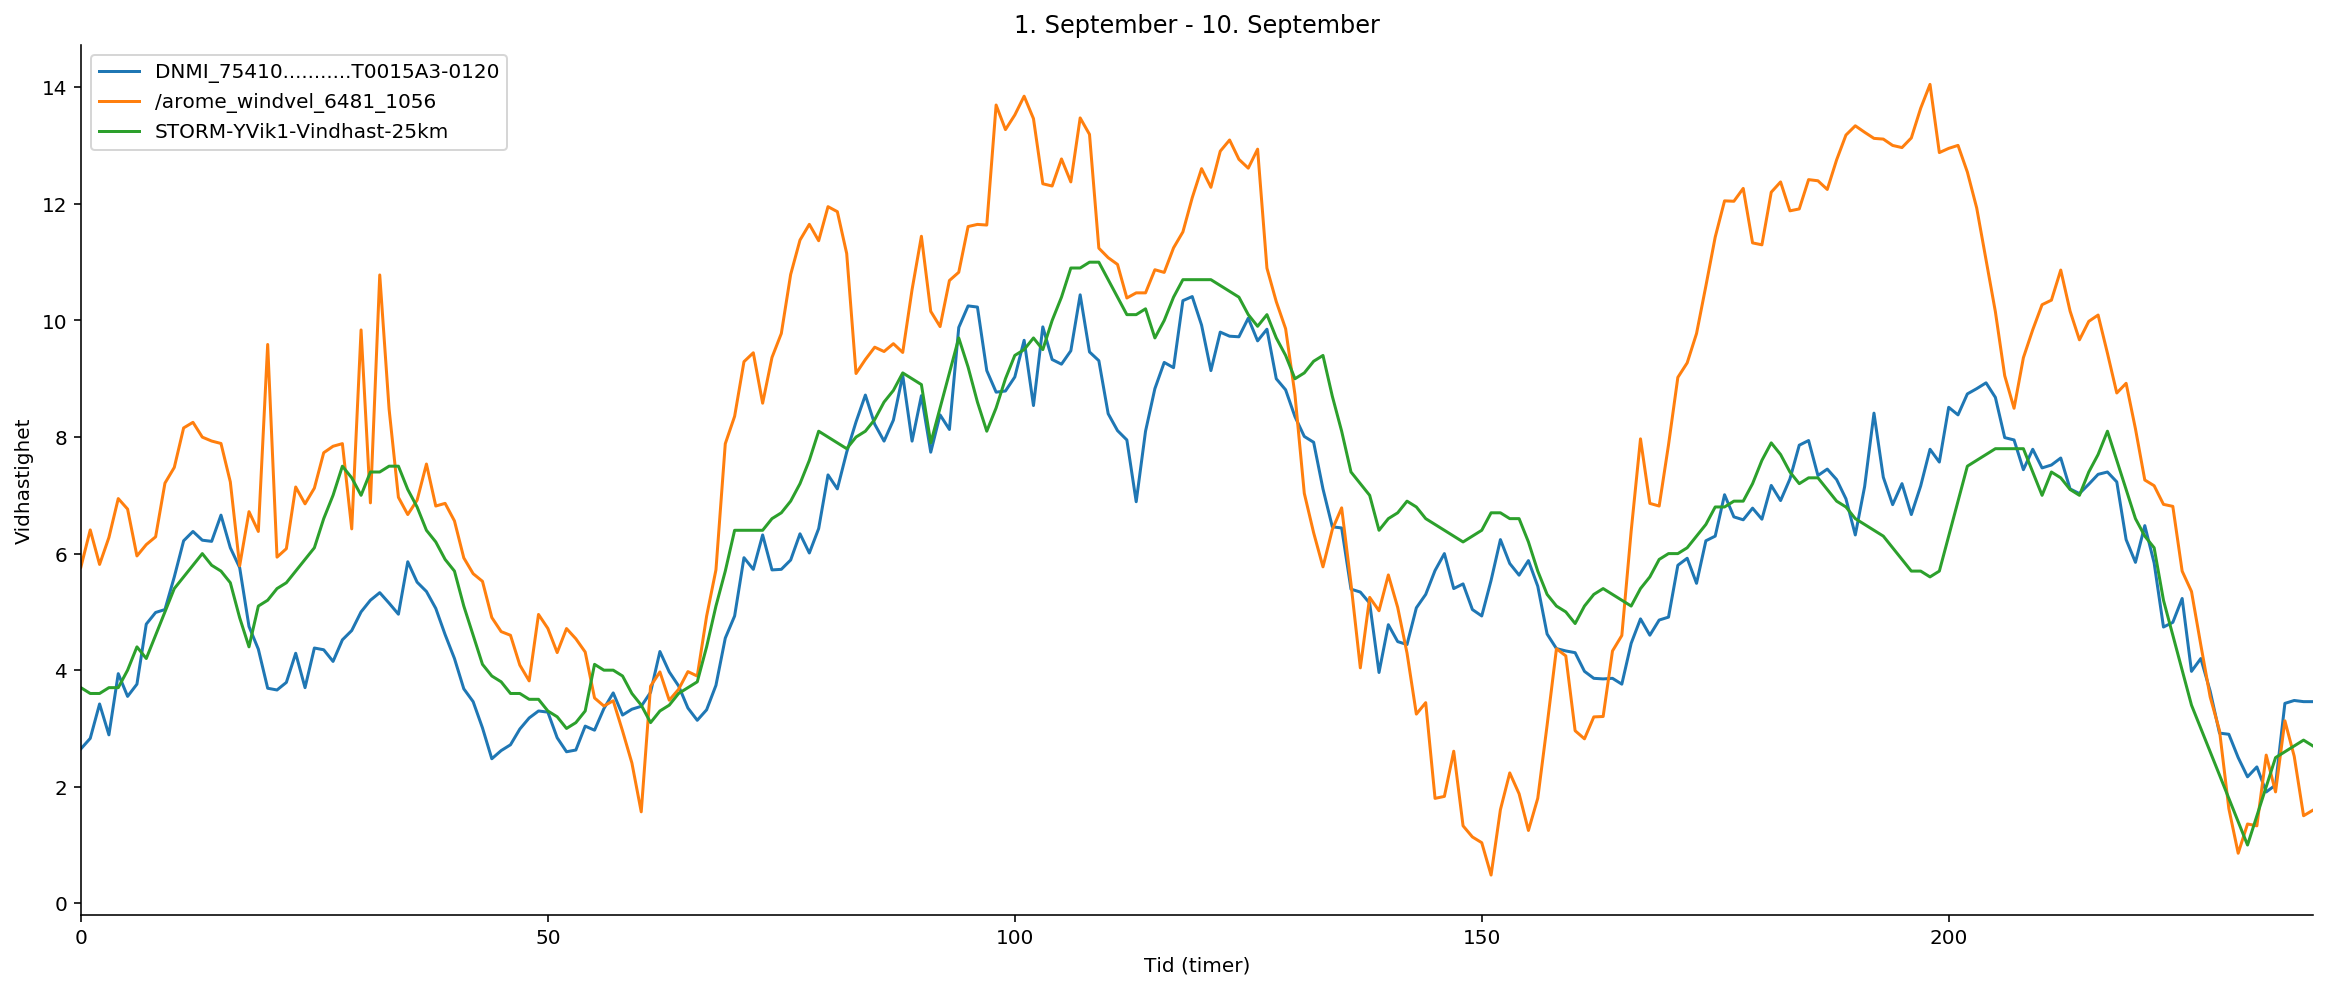

In [19]:
# set time limit
time = 240

#ax = df_tek['YVIK-YtreVikna1-Sum-produksjon'].head(time).plot(figsize=(20,8))


# Fyr 
ax = df_tek['DNMI_75410...........T0015A3-0120'].head(time).plot(figsize=(20,8))
ax = df_arome['/arome_windvel_6481_1056'].head(time).plot(figsize=(20,8))
ax = df_tek['STORM-YVik1-Vindhast-25km'].head(time).plot(figsize=(20,8))

# Rørvik lufthavn
#ax = df_tek['DNMI_75220...........T0015A3-0120'].head(time).plot(figsize=(20,8))
#ax = df_arome['/arome_windvel_6482_1114'].head(time).plot(figsize=(20,8))


#øy i nord
#ax = df_tek['DNMI_75550...........T0015A3-0120'].head(time).plot(figsize=(20,8))
#ax = df_arome['/arome_windvel_6520_1098'].head(time).plot(figsize=(20,8))




plt.xlabel('Tid (timer)')
plt.ylabel('Vidhastighet')
plt.title('1. September - 10. September')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
fig.savefig('24_punkter.png')

#### Datasett for vindturbin 10

In [6]:
df_tek['YVIK-YtreVikna1-G10-T4015A3 -0104 delayed'] = df_tek_delayed_2['YVIK-YtreVikna1-G10-T4015A3 -0104']
df_tek['STORM-YVik1-Vindhast-25km delayed_1'] = df_tek_delayed_1['STORM-YVik1-Vindhast-25km']
df_tek['STORM-YVik1-Vindhast-25km delayed_2'] = df_tek_delayed_2['STORM-YVik1-Vindhast-25km']

df_tek['STORM-YVik1-Vindretn-25km delayed_1'] = df_tek_delayed_1['STORM-YVik1-Vindretn-25km']
df_tek['STORM-YVik1-Vindretn-25km delayed_2'] = df_tek_delayed_2['STORM-YVik1-Vindretn-25km']

In [8]:
uff = pd.concat([
                df_tek['STORM-YVik1-Vindhast-25km'],
                df_tek['STORM-YVik1-Vindhast-25km delayed_1'],
                df_tek['STORM-YVik1-Vindhast-25km delayed_2'],
    
    
                df_tek['STORM-YVik1-Vindretn-25km'], 
                df_tek['STORM-YVik1-Vindretn-25km delayed_1'],
                df_tek['STORM-YVik1-Vindretn-25km delayed_2'],
    
    
                df_tek['YVIK-YtreVikna1-G10-T4015A3 -0104 delayed'],
                               
                df_tek['YVIK-YtreVikna1-G10-T4015A3 -0104']
    
               ], 
               axis = 1)

In [9]:
uff.to_csv('Singel test time.csv', sep=';', index = False)

In [33]:
data_advanced.corr()['YVIK-YtreVikna1-Sum-produksjon']

STORM-YVik1-Vindhast-25km delayed_2                0.862378
STORM-YVik1-Vindhast-25km delayed_1                0.877109
STORM-YVik1-Vindhast-25km                          0.879233
STORM-YVik1-Vindretn-25km delayed_2               -0.025641
STORM-YVik1-Vindretn-25km delayed_1               -0.012148
STORM-YVik1-Vindretn-25km                         -0.000730
/arome_windvel_6491_1087 delayed_2                 0.722803
/arome_windvel_6491_1087 delayed_1                 0.720341
/arome_windvel_6491_1087                           0.708550
/arome_airtemp_6491_1087 delayed_2                 0.176718
/arome_airtemp_6491_1087 delayed_1                 0.178481
/arome_airtemp_6491_1087                           0.180011
/arome_windvel_6481_1056 delayed_2                 0.718802
/arome_windvel_6481_1056 delayed_1                 0.712855
/arome_windvel_6481_1056                           0.696483
DNMI_75410...........T0015A3-0120                  0.774844
/arome_windvel_6482_1114 delayed_2      

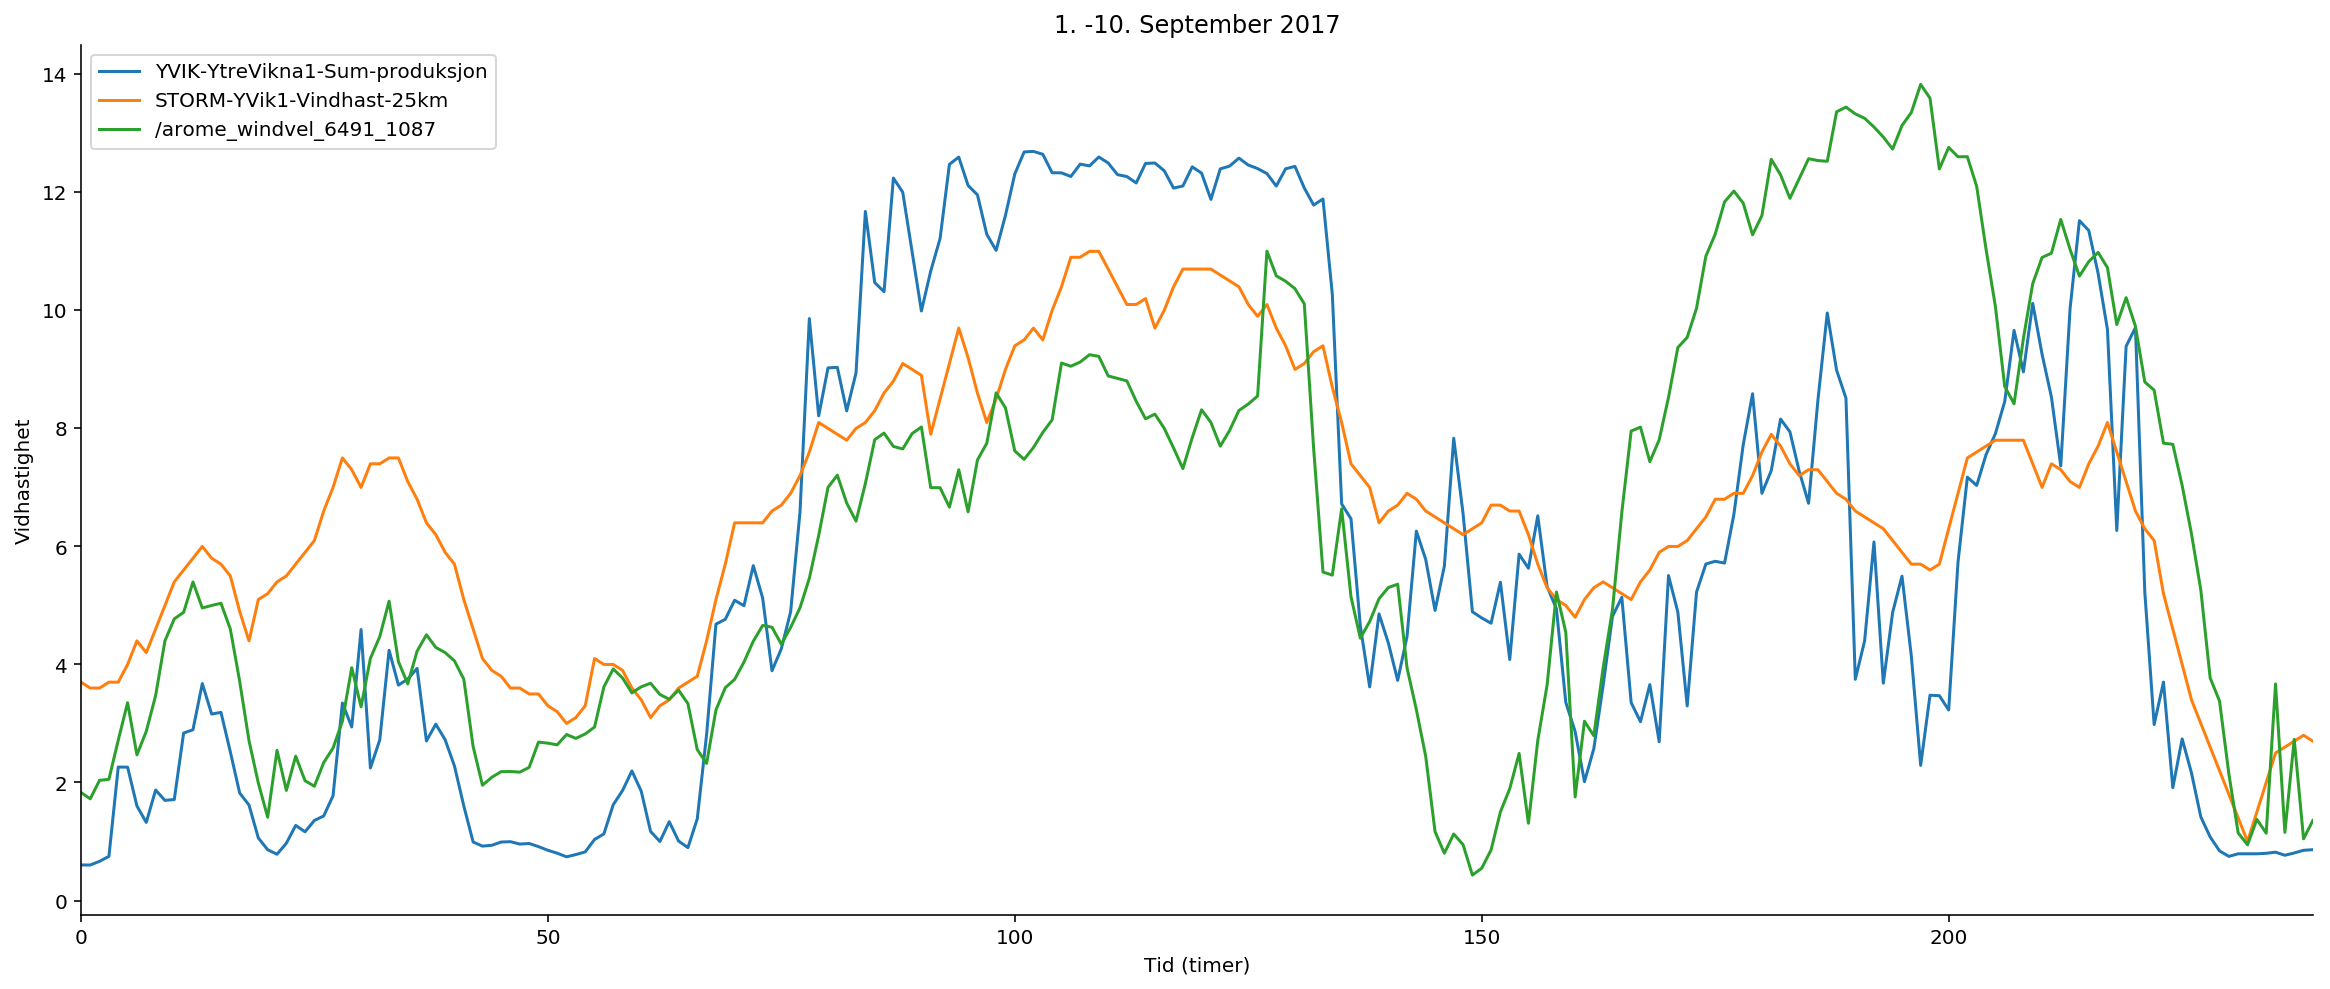

In [16]:
# set time limit
time = 240

ax = ((1/3)*df_tek['YVIK-YtreVikna1-Sum-produksjon']).head(time).plot(figsize=(20,8))

# Storm 
ax = df_tek['STORM-YVik1-Vindhast-25km'].head(time).plot(figsize=(20,8))
ax = df_arome['/arome_windvel_6491_1087'].head(time).plot(figsize=(20,8))


#ax = df_tek['DNMI_75220...........T0015A3-0120'].head(time).plot(figsize=(20,8))

# Rørvik lufthavn
#ax = df_tek['DNMI_75220...........T0015A3-0120'].head(time).plot(figsize=(20,8))
#ax = df_arome['/arome_windvel_6482_1114'].head(time).plot(figsize=(20,8))


#øy i nord
#ax = df_tek['DNMI_75550...........T0015A3-0120'].head(time).plot(figsize=(20,8))
#ax = df_arome['/arome_windvel_6520_1098'].head(time).plot(figsize=(20,8))




plt.xlabel('Tid (timer)')
plt.ylabel('Vidhastighet')
plt.title('1. -10. September 2017')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
fig.savefig('comparison.png')